# Práctica con cadenas
## El problema

In [1]:
from Genética_1000_unos import crossover, seleccion_elitista, mutar, aptitud, seleccionar_ruleta, seleccion_elitista
import numpy as np
import random
INDIVIDUOS = 100
GENES = 100
MUTACION = 0.1

1. Escribir un AG sin crossover ni mutaci´on. Se pide analizar como var´ıa la media entre generaciones y deducir a que se debe esta evoluci´on.

63


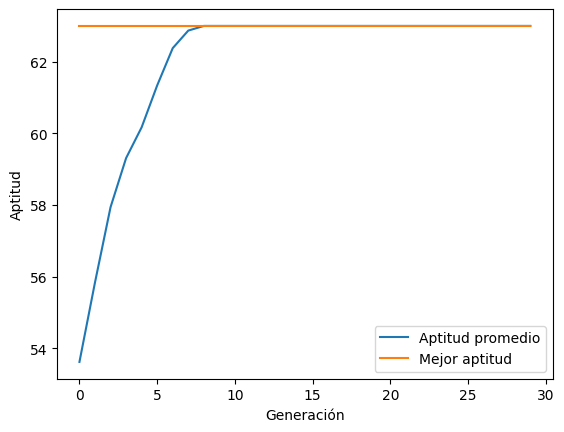

In [2]:
# Apartado 1. Ni crossover ni mutación
poblacion = np.random.choice([0,1], size=(INDIVIDUOS, GENES))
mejores_aptitudes = []
aptitud_promedio = []
mejor_aptitud_actual = 0

max_iteraciones = 30

while mejor_aptitud_actual < 100 and len(mejores_aptitudes) < max_iteraciones:
    nueva_generacion = []
    while len(nueva_generacion) < INDIVIDUOS:
        padres = seleccionar_ruleta(poblacion, 2)
        # No hacemos crossover. El hijo será el mejor de los padres.
        nuevo_individuo = max(padres, key=aptitud)
        nueva_generacion.append(nuevo_individuo)
    nueva_generacion = np.array(nueva_generacion)
    # No mutamos nunca.

    aptitudes = [aptitud(individuo) for individuo in nueva_generacion]
    mejor_aptitud_actual = np.max(aptitudes)
    mejores_aptitudes.append(mejor_aptitud_actual)
    aptitud_promedio.append(np.mean(aptitudes))
    poblacion = nueva_generacion

print(mejores_aptitudes[-1])

# Usar matplotlib para graficar la aptitud promedio y la mejor aptitud
import matplotlib.pyplot as plt
plt.plot(aptitud_promedio, label='Aptitud promedio')
plt.plot(mejores_aptitudes, label='Mejor aptitud')
plt.xlabel('Generación')
plt.ylabel('Aptitud')
plt.legend()
plt.show()

Se puede ver como rápidamente converge en un valor no demasiado bueno, dado que no hay variación de la población, sino que esta llega a ser una multitud de clones del mejor individuo inicial (que era aleatorio)

2. Introducir un operador mutaci´on con probabilidad pm = 1. Se pide analizar como var´ıa la media entre generaciones y deducir a que se debe esta evoluci´on.

88


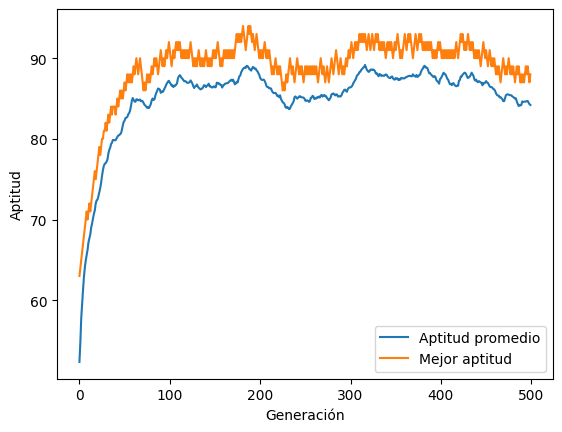

In [3]:
# Apartado 2. Mutación siempre, crossover nunca
poblacion = np.random.choice([0, 1], size=(INDIVIDUOS, GENES))
mejores_aptitudes = []
aptitud_promedio = []
mejor_aptitud_actual = 0

max_iteraciones = 500

while mejor_aptitud_actual < 100 and len(mejores_aptitudes) < max_iteraciones:
    nueva_generacion = []
    while len(nueva_generacion) < INDIVIDUOS:
        padres = seleccionar_ruleta(poblacion, 2)
        # No hacemos crossover. El hijo será el mejor de los padres.
        nuevo_individuo = max(padres, key=aptitud)
        nueva_generacion.append(nuevo_individuo)
    nueva_generacion = np.array(nueva_generacion)
    # Mutamos siempre
    mutar(nueva_generacion, 1)

    aptitudes = [aptitud(individuo) for individuo in nueva_generacion]
    mejor_aptitud_actual = np.max(aptitudes)
    mejores_aptitudes.append(mejor_aptitud_actual)
    aptitud_promedio.append(np.mean(aptitudes))
    poblacion = nueva_generacion

print(mejores_aptitudes[-1])

# Usar matplotlib para graficar la aptitud promedio y la mejor aptitud
import matplotlib.pyplot as plt

plt.plot(aptitud_promedio, label="Aptitud promedio")
plt.plot(mejores_aptitudes, label="Mejor aptitud")
plt.xlabel("Generación")
plt.ylabel("Aptitud")
plt.legend()
plt.show()

Tras 500 ejecuciones vemos que pasa algo similar al paratado 1, pero que gracias a la mutación, el estancamiento se convierte en oscilación y los valores medios acaban siendo cercanos a 90.

3. Introducir un operador crossover con probabilidad pc = 1 y apagar el operador mutaci´on (pm =0). Se pide analizar como var´ıa la media entre generaciones y deducir a que se debe esta evoluci´on.

Generación 100 Mejor aptitud 74, aptitud promedio 70.93
Generación 200 Mejor aptitud 75, aptitud promedio 73.84
Generación 300 Mejor aptitud 75, aptitud promedio 75.0
Generación 400 Mejor aptitud 75, aptitud promedio 75.0
Generación 500 Mejor aptitud 75, aptitud promedio 75.0
Generación 600 Mejor aptitud 75, aptitud promedio 75.0
Generación 700 Mejor aptitud 75, aptitud promedio 75.0
Generación 800 Mejor aptitud 75, aptitud promedio 75.0
Generación 900 Mejor aptitud 75, aptitud promedio 75.0
Generación 1000 Mejor aptitud 75, aptitud promedio 75.0
Generación 1100 Mejor aptitud 75, aptitud promedio 75.0
Generación 1200 Mejor aptitud 75, aptitud promedio 75.0
Generación 1300 Mejor aptitud 75, aptitud promedio 75.0
Generación 1400 Mejor aptitud 75, aptitud promedio 75.0
Generación 1500 Mejor aptitud 75, aptitud promedio 75.0
Generación 1600 Mejor aptitud 75, aptitud promedio 75.0
Generación 1700 Mejor aptitud 75, aptitud promedio 75.0
Generación 1800 Mejor aptitud 75, aptitud promedio 75.0

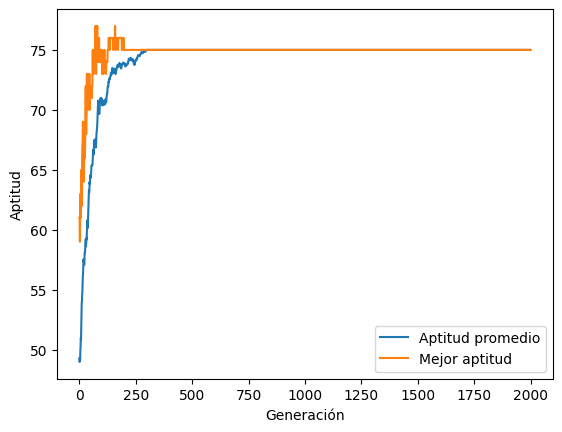

In [4]:
# Apartado 3. Crossover siempre, mutación nunca
poblacion = np.random.choice([0, 1], size=(INDIVIDUOS, GENES))
mejores_aptitudes = []
aptitud_promedio = []
mejor_aptitud_actual = 0

max_iteraciones = 2000

while mejor_aptitud_actual < 100 and len(mejores_aptitudes) < max_iteraciones:
    nueva_generacion = []
    while len(nueva_generacion) < INDIVIDUOS:
        padres = seleccionar_ruleta(poblacion, 2)
        hijos = crossover(padres, tipo=2)
        for hijo in hijos:
            nueva_generacion.append(hijo)
    # No mutamos

    aptitudes = [aptitud(individuo) for individuo in nueva_generacion]
    mejor_aptitud_actual = np.max(aptitudes)
    mejores_aptitudes.append(mejor_aptitud_actual)
    aptitud_promedio.append(np.mean(aptitudes))
    poblacion = nueva_generacion
    
    if len(mejores_aptitudes) % 100 == 0:
        print(f'Generación {len(mejores_aptitudes)} Mejor aptitud {mejor_aptitud_actual}, aptitud promedio {aptitud_promedio[-1]}')

print(mejores_aptitudes[-1])

# Usar matplotlib para graficar la aptitud promedio y la mejor aptitud
import matplotlib.pyplot as plt

plt.plot(aptitud_promedio, label="Aptitud promedio")
plt.plot(mejores_aptitudes, label="Mejor aptitud")
plt.xlabel("Generación")
plt.ylabel("Aptitud")
plt.legend()
plt.show()



Se puede ver como la mejor aptitud de todas se estanca debido a que llega a un punto en el que es necesaria la mutación para evitar un máximo local.
También se ve como la media alcanza la mejor aptitud. Nótese que esta mejor aptitud puede ser descendida a lo largo de las generaciones debido a la ruleta con pesos.

4. Considerar un caso con mutaci´on y crossover activos.

Generación 100 Mejor aptitud 76, aptitud promedio 70.93
Generación 200 Mejor aptitud 80, aptitud promedio 74.01
Generación 300 Mejor aptitud 84, aptitud promedio 79.5
Generación 400 Mejor aptitud 86, aptitud promedio 80.24
Generación 500 Mejor aptitud 84, aptitud promedio 76.22
Generación 600 Mejor aptitud 86, aptitud promedio 79.96
Generación 700 Mejor aptitud 87, aptitud promedio 80.27
Generación 800 Mejor aptitud 87, aptitud promedio 82.23
Generación 900 Mejor aptitud 87, aptitud promedio 82.19
Generación 1000 Mejor aptitud 89, aptitud promedio 83.82
Generación 1100 Mejor aptitud 88, aptitud promedio 84.38
Generación 1200 Mejor aptitud 87, aptitud promedio 83.25
Generación 1300 Mejor aptitud 89, aptitud promedio 82.47
Generación 1400 Mejor aptitud 87, aptitud promedio 81.7
Generación 1500 Mejor aptitud 83, aptitud promedio 77.85
Generación 1600 Mejor aptitud 83, aptitud promedio 77.4
Generación 1700 Mejor aptitud 87, aptitud promedio 80.89
Generación 1800 Mejor aptitud 84, aptitud p

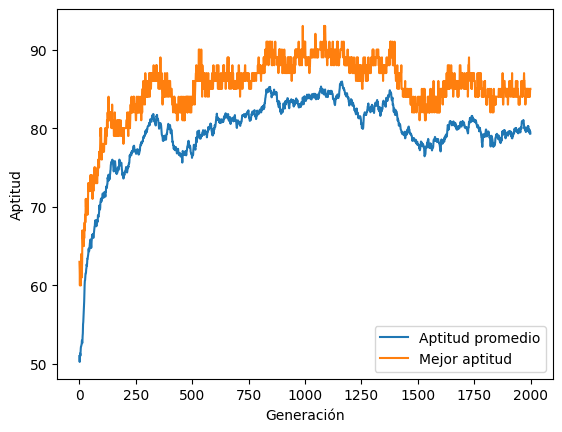

In [5]:
# Apartado 4. Usar mutación y crossover
poblacion = np.random.choice([0, 1], size=(INDIVIDUOS, GENES))
mejores_aptitudes = []
aptitud_promedio = []
mejor_aptitud_actual = 0

max_iteraciones = 2000

while mejor_aptitud_actual < 100 and len(mejores_aptitudes) < max_iteraciones:
    nueva_generacion = []
    while len(nueva_generacion) < INDIVIDUOS:
        padres = seleccionar_ruleta(poblacion, 2)
        hijos = crossover(padres, tipo=2)
        for hijo in hijos:
            nueva_generacion.append(hijo)
    # Mutamos aleatoriamente
    mutar(nueva_generacion, 0.1)

    aptitudes = [aptitud(individuo) for individuo in nueva_generacion]
    mejor_aptitud_actual = np.max(aptitudes)
    mejores_aptitudes.append(mejor_aptitud_actual)
    aptitud_promedio.append(np.mean(aptitudes))
    poblacion = nueva_generacion
    
    if len(mejores_aptitudes) % 100 == 0:
        print(f'Generación {len(mejores_aptitudes)} Mejor aptitud {mejor_aptitud_actual}, aptitud promedio {aptitud_promedio[-1]}')

print(mejores_aptitudes[-1])

# Usar matplotlib para graficar la aptitud promedio y la mejor aptitud
import matplotlib.pyplot as plt

plt.plot(aptitud_promedio, label="Aptitud promedio")
plt.plot(mejores_aptitudes, label="Mejor aptitud")
plt.xlabel("Generación")
plt.ylabel("Aptitud")
plt.legend()
plt.show()

Vemos como se produce un rápido ascenso el la aptitud media, mientras que el 10% de probabilidad de mutación hace que, pese a que parezca converger, haya oscilaciones que siguen aumentando muy ligeramente como tendencia general.

5. Introducir un operador de elitismo en la ruleta implementada para la selecci´on.

100


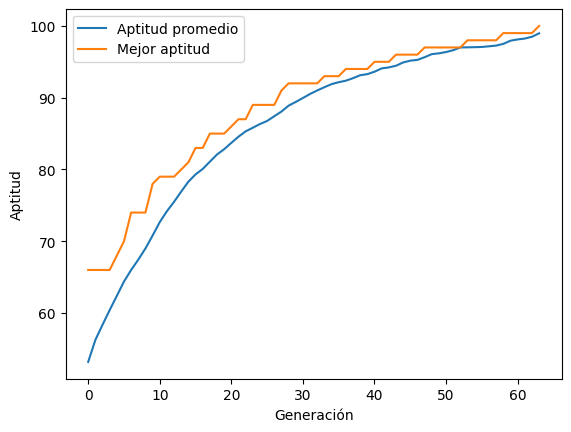

In [6]:
# Apartado 5. Añadir elitismo
poblacion = np.random.choice([0, 1], size=(INDIVIDUOS, GENES))
mejores_aptitudes = []
aptitud_promedio = []
mejor_aptitud_actual = 0

max_iteraciones = 2000

while mejor_aptitud_actual < 100 and len(mejores_aptitudes) < max_iteraciones:
    nueva_generacion = []
    while len(nueva_generacion) < INDIVIDUOS:
        padres = seleccionar_ruleta(poblacion, 2)
        hijos = crossover(padres, tipo=2)
        for hijo in hijos:
            nueva_generacion.append(hijo)
    # Mutamos aleatoriamente
    mutar(nueva_generacion, 0.1)
    
    # Aplicamos el elitismo
    nueva_generacion = seleccion_elitista(np.vstack([poblacion, nueva_generacion]), INDIVIDUOS, aptitud)

    aptitudes = [aptitud(individuo) for individuo in nueva_generacion]
    mejor_aptitud_actual = np.max(aptitudes)
    mejores_aptitudes.append(mejor_aptitud_actual)
    aptitud_promedio.append(np.mean(aptitudes))
    poblacion = nueva_generacion
    
    if len(mejores_aptitudes) % 100 == 0:
        print(f'Generación {len(mejores_aptitudes)} Mejor aptitud {mejor_aptitud_actual}, aptitud promedio {aptitud_promedio[-1]}')

print(mejores_aptitudes[-1])

# Usar matplotlib para graficar la aptitud promedio y la mejor aptitud
import matplotlib.pyplot as plt

plt.plot(aptitud_promedio, label="Aptitud promedio")
plt.plot(mejores_aptitudes, label="Mejor aptitud")
plt.xlabel("Generación")
plt.ylabel("Aptitud")
plt.legend()
plt.show()

Con el elitirmos observamos que rápidamente el algoritmo converge, produciendo un individuo óptimo, cuya aptitud es 100, produciendo la salida del bucle principal.

## Ejercicios

### Ejercicio 1
Modificar el código anterior Utilizando el alfabeto decimal (dígitos del 0 al 9) para una cadena de longitud 20 para encontrar una cadena que contenga el mayor n´umero de 3.

Generación 100 Mejor aptitud 178, aptitud promedio 178.0
Generación 200 Mejor aptitud 182, aptitud promedio 182.0
Generación 300 Mejor aptitud 185, aptitud promedio 185.0
Generación 400 Mejor aptitud 185, aptitud promedio 185.0
Generación 500 Mejor aptitud 187, aptitud promedio 187.0
Generación 600 Mejor aptitud 192, aptitud promedio 192.0
Generación 700 Mejor aptitud 193, aptitud promedio 193.0
Generación 800 Mejor aptitud 194, aptitud promedio 194.0
Generación 900 Mejor aptitud 194, aptitud promedio 194.0
Generación 1000 Mejor aptitud 194, aptitud promedio 194.0
Generación 1100 Mejor aptitud 194, aptitud promedio 194.0
Generación 1200 Mejor aptitud 194, aptitud promedio 194.0
Generación 1300 Mejor aptitud 195, aptitud promedio 195.0
Generación 1400 Mejor aptitud 196, aptitud promedio 196.0
Generación 1500 Mejor aptitud 196, aptitud promedio 196.0
Generación 1600 Mejor aptitud 197, aptitud promedio 197.0
Generación 1700 Mejor aptitud 197, aptitud promedio 197.0
Generación 1800 Mejor a

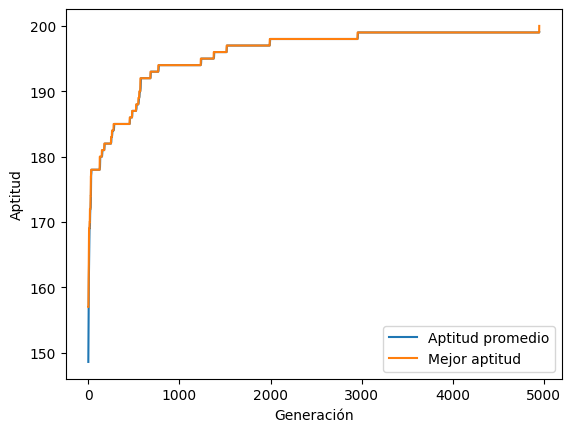

[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
200


In [7]:
# Ejericio 1
def aptitud_treses(individuo) -> float:
    """Función de aptitud para el problema de los 20 treses."""
    # Cuanto más treses tenga el vector, mayor será su aptitud.
    # Devolvemos la suma de los siguiente:
    # si es 0, 7
    # si es 1, 8
    # si es 2, 9
    # si es 3, 10
    # si es 4, 9
    # si es 5, 8
    # si es 6, 7
    # si es 7, 6
    # si es 8, 5
    # si es 9, 4
    return sum([7, 8, 9, 10, 9, 8, 7, 6, 5, 4][gen] for gen in individuo)


def mutar_treses(individuo: np.ndarray, probabilidad: float, max_genes=1) -> None:
    """Muta un individuo con una probabilidad dada."""
    # Recorremos la población
    for cromosoma in poblacion:
        # Si sufre una mutación
        if random.uniform(0, 1) <= probabilidad:
            for _ in range(random.randint(1, max_genes)):
                # Elegimos el índice del gen a mutar
                indice_gen = random.randint(0, len(cromosoma) - 1)
                cromosoma[indice_gen] = random.randint(0, 9)


# Creamos la población entre L y 2L. Por ejemplo, 40 individuos de 20 genes cada uno. Estos genes serán 0-9.
INDIVIDUOS = 20
GENES = 20
poblacion = np.random.choice(range(10), size=(INDIVIDUOS, GENES))

aptitudes = [aptitud_treses(individuo) for individuo in poblacion]
aptitud_promedio = []
mejor_aptitud_actual = max(aptitudes)
mejores_aptitudes = []

max_iteraciones = 6000

while mejor_aptitud_actual != 200 and len(mejores_aptitudes) < max_iteraciones:
    nueva_generacion = []
    while len(nueva_generacion) < INDIVIDUOS:
        padres = seleccionar_ruleta(poblacion, 2, aptitud_treses)
        hijos = crossover(padres, tipo=1)

        for hijo in hijos:
            nueva_generacion.append(hijo)

    # Mutamos aleatoriamente
    mutar_treses(nueva_generacion, 0.01)

    # Aplicamos el elitismo
    nueva_generacion = seleccion_elitista(
        np.vstack([poblacion, nueva_generacion]), INDIVIDUOS, aptitud_treses
    )

    aptitudes = [aptitud_treses(individuo) for individuo in nueva_generacion]
    mejor_aptitud_actual = np.max(aptitudes)
    mejores_aptitudes.append(mejor_aptitud_actual)
    aptitud_promedio.append(np.mean(aptitudes))
    poblacion = nueva_generacion

    if len(mejores_aptitudes) % 100 == 0:
        print(
            f"Generación {len(mejores_aptitudes)} Mejor aptitud {mejor_aptitud_actual}, aptitud promedio {aptitud_promedio[-1]}"
        )

print(mejores_aptitudes[-1])

# Usar matplotlib para graficar la aptitud promedio y la mejor aptitud
import matplotlib.pyplot as plt

plt.plot(aptitud_promedio, label="Aptitud promedio")
plt.plot(mejores_aptitudes, label="Mejor aptitud")
plt.xlabel("Generación")
plt.ylabel("Aptitud")
plt.legend()
plt.show()

# imprimir el mejor individuo
mejor_individuo = poblacion[
    np.argmax([aptitud_treses(individuo) for individuo in poblacion])
]
print(mejor_individuo)
print(aptitud_treses(mejor_individuo))


### Ejercicio 2
Sea una cadena de longitud n. Escriba en pseudoc´odigo el proceso que hay que realizar para saber cu´antas subcadenas 25 contiene (detr´as de un 2 tiene que haber un 5). Recuerde que la primera posici´on de una cadena es la posici´on 0 y que las cadenas se leen de izquierda a derecha.
Modifique la funci´on de aptitud para que el AG busque una cadena que contenga el mayor
n´umero de subcadenas 25 posibles. Todas las cadenas tienen longitud 15 y est´an formadas
sobre el alfabeto Sigma = 0,1,2,3,4,5,6,7,8,9. Cambie los valores de los par´ametros (tama˜no de la poblaci´on, probabilidad de crossover, probabilidad de mutaci´on y n´umero m´aximo de generaciones) hasta conseguir que el AG devuelva una buena soluci´on.

``` python
def contar_cadenas_25(individuo) -> int:
    total_cadenas = 0
    for i in range(len(individuo)-1):
        #Si nos encontramos con un 2 nos preocupamos
        if individuo[i] == 2:
            #Si el siguiente es un 5, tenemos una cadena 25
            if individuo[i+1] == 5:
                total_cadenas += 1
    return total_cadenas
```

In [8]:
# Función aptitud para subcadenas 25
def aptitud_cadenas_25(individuo, mejora: bool = False) -> int:
    """Cuantas más subcadenas 25 tenga individuo, mayor será su aptitud."""
    total_cadenas = 0
    for i in range(len(individuo)-1):
        #Si nos encontramos con un 2 nos preocupamos
        if individuo[i] == 2:
            #Si el siguiente es un 5, tenemos una cadena 25
            if individuo[i+1] == 5:
                if not mejora:
                    total_cadenas += 1
                else:
                    total_cadenas += 10
        #para mejorar algo el algoritmo, premiamos que haya 2s y 5s
        if mejora:
            if individuo[i] == 5 or individuo[i] == 2:
                    total_cadenas += 2
                    
    return total_cadenas


Generación 100 Mejor aptitud 5, aptitud promedio 5.0
Generación 200 Mejor aptitud 5, aptitud promedio 5.0
Generación 300 Mejor aptitud 6, aptitud promedio 6.0
Generación 400 Mejor aptitud 6, aptitud promedio 6.0
Generación 500 Mejor aptitud 6, aptitud promedio 6.0
Generación 600 Mejor aptitud 6, aptitud promedio 6.0
Generación 700 Mejor aptitud 6, aptitud promedio 6.0
Generación 800 Mejor aptitud 6, aptitud promedio 6.0
Generación 900 Mejor aptitud 6, aptitud promedio 6.0
Generación 1000 Mejor aptitud 6, aptitud promedio 6.0
Generación 1100 Mejor aptitud 6, aptitud promedio 6.0
Generación 1200 Mejor aptitud 6, aptitud promedio 6.0
Generación 1300 Mejor aptitud 6, aptitud promedio 6.0
Generación 1400 Mejor aptitud 6, aptitud promedio 6.0
Generación 1500 Mejor aptitud 6, aptitud promedio 6.0
Generación 1600 Mejor aptitud 6, aptitud promedio 6.0
Generación 1700 Mejor aptitud 6, aptitud promedio 6.0
Generación 1800 Mejor aptitud 6, aptitud promedio 6.0
Generación 1900 Mejor aptitud 6, apti

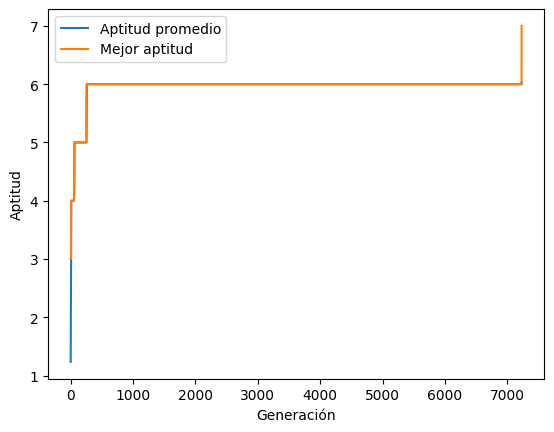

[2 5 2 5 2 5 2 5 2 5 2 5 2 5 4]
7


In [9]:
# Creamos la población entre L y 2L. Por ejemplo, 30 individuos de 20 genes cada uno. Estos genes serán 0-9.
INDIVIDUOS = 30
GENES = 15
poblacion = np.random.choice(range(10), size=(INDIVIDUOS, GENES))

aptitudes = [aptitud_cadenas_25(individuo) for individuo in poblacion]
aptitud_promedio = []
mejor_aptitud_actual = max(aptitudes)
mejores_aptitudes = []

max_iteraciones = 9000

while mejor_aptitud_actual != 7 and len(mejores_aptitudes) < max_iteraciones:
    nueva_generacion = []
    while len(nueva_generacion) < INDIVIDUOS:
        padres = seleccionar_ruleta(poblacion, 2, aptitud_cadenas_25)
        hijos = crossover(padres, tipo=2, probabilidad=0.7)

        for hijo in hijos:
            nueva_generacion.append(hijo)

    # Mutamos aleatoriamente
    mutar_treses(nueva_generacion, 0.7, 15)

    # Aplicamos el elitismo
    nueva_generacion = seleccion_elitista(
        np.vstack([poblacion, nueva_generacion]), INDIVIDUOS, aptitud_cadenas_25
    )

    aptitudes = [aptitud_cadenas_25(individuo) for individuo in nueva_generacion]
    mejor_aptitud_actual = np.max(aptitudes)
    mejores_aptitudes.append(mejor_aptitud_actual)
    aptitud_promedio.append(np.mean(aptitudes))
    poblacion = nueva_generacion

    if len(mejores_aptitudes) % 100 == 0:
        print(
            f"Generación {len(mejores_aptitudes)} Mejor aptitud {mejor_aptitud_actual}, aptitud promedio {aptitud_promedio[-1]}"
        )

# Usar matplotlib para graficar la aptitud promedio y la mejor aptitud
import matplotlib.pyplot as plt

plt.plot(aptitud_promedio, label="Aptitud promedio")
plt.plot(mejores_aptitudes, label="Mejor aptitud")
plt.xlabel("Generación")
plt.ylabel("Aptitud")
plt.legend()
plt.show()

# imprimir el mejor individuo
mejor_individuo = poblacion[
    np.argmax([aptitud_cadenas_25(individuo) for individuo in poblacion])
]
print(mejor_individuo)
print(aptitud_cadenas_25(mejor_individuo))


Por lo general, con 30 individuos, probabilidad de crossover en 0,7 usando el tipo 2, la probabilidad de mutación establecida en 0.7 pudiendo mutar como máximo 15 genes (es decir, todos), y estableciendo el máximo de generaciones en 6000, se obtiene una solución óptima en menos de 1500 generaciones.
Se puede decir que es óptima porque secuencias de pares ordenados (2,5) en un vector de longitud 15 puede haber como mucho la mitad truncando en caso de decimal. En este caso ese valor es 7. Gracias a este conocimiento, se lo añadimos también al algoritmo para que pare cuando llegue al óptimo.


### Ejercicio 3
Un AG siempre maximiza. Escribir un pseudoc´odigo que resuelva el problema de encontrar la
cadena que tenga el menor peso donde por peso se entiende la suma de los genes para el mismo cromosoma del primer ejercicio.

El problema estaría en la función de aptitud, que debería ser modificada. La otra opción sería modificar el resto del código para que la preferencia fuera la minimización en lugar de la maximización, pero resulta más engorroso. Por ello se descarta.
¿Quién impide utilizar la misma función aptitud que en el ejercicio 1 pero cambiada de signo?
Quedaría algo así:
```python
def aptitud(individuo):
    return -sum(individuo)
```
##### Demostración de funcionamineto:

Generación 100 Mejor aptitud -33, aptitud promedio -33.92
0


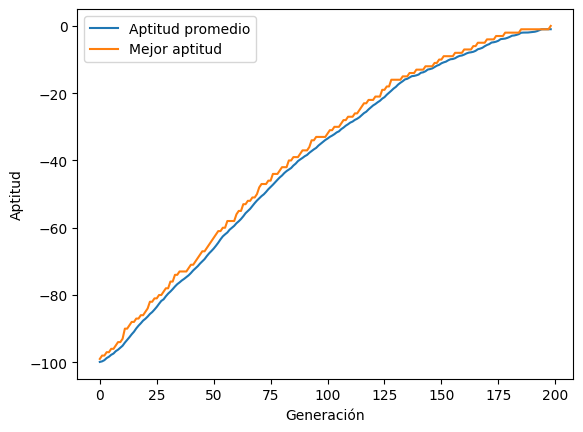

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [4]:
# Ejercicio 3. Minimizar en lugar de maximizar

def aptitud_ceros(individuo) -> float:
    """Función de aptitud para el problema de los 1000 ceros."""
    # Cuanto más ceros tenga el vector, mayor será su aptitud.
    return -sum(individuo)

INDIVIDUOS = 100
GENES = 100
MUTACION = 0.1

poblacion = np.random.choice([1], size=(INDIVIDUOS, GENES))
mejores_aptitudes = []
aptitud_promedio = []
mejor_aptitud_actual = max([aptitud_ceros(individuo) for individuo in poblacion])

max_iteraciones = 2000

while mejor_aptitud_actual < 0 and len(mejores_aptitudes) < max_iteraciones:
    nueva_generacion = []
    while len(nueva_generacion) < INDIVIDUOS:
        padres = seleccionar_ruleta(poblacion, 2)
        hijos = crossover(padres, tipo=2, probabilidad=0.7)
        for hijo in hijos:
            nueva_generacion.append(hijo)
    # Mutamos aleatoriamente
    mutar(nueva_generacion, 0.1)
    
    # Aplicamos el elitismo
    nueva_generacion = seleccion_elitista(np.vstack([poblacion, nueva_generacion]), INDIVIDUOS, aptitud_ceros)

    aptitudes = [aptitud_ceros(individuo) for individuo in nueva_generacion]
    mejor_aptitud_actual = np.max(aptitudes)
    mejores_aptitudes.append(mejor_aptitud_actual)
    aptitud_promedio.append(np.mean(aptitudes))
    poblacion = nueva_generacion
    
    if len(mejores_aptitudes) % 100 == 0:
        print(f'Generación {len(mejores_aptitudes)} Mejor aptitud {mejor_aptitud_actual}, aptitud promedio {aptitud_promedio[-1]}')

print(mejores_aptitudes[-1])

# Usar matplotlib para graficar la aptitud promedio y la mejor aptitud
import matplotlib.pyplot as plt

plt.plot(aptitud_promedio, label="Aptitud promedio")
plt.plot(mejores_aptitudes, label="Mejor aptitud")
plt.xlabel("Generación")
plt.ylabel("Aptitud")
plt.legend()
plt.show()

#Para cerciorarnos de que el algoritmo ha funcionado, imprimimos el mejor individuo
mejor_individuo = poblacion[np.argmax([aptitud_ceros(individuo) for individuo in poblacion])]
print(mejor_individuo)

Complicándoselo al máximo, es decir, comenzando con todos los individuos como 100 1s, en menos de 500 iteraciones de media consigue llegar al óptimo.

También podemos cambiar la aptitud para que sea siempre positiva, ya que la negatividad podría llegar a afectar a la selección:
```python
def aptitud(individuo):
    return 100-sum(individuo)
```

Generación 100 Mejor aptitud 64, aptitud promedio 63.18
Generación 200 Mejor aptitud 99, aptitud promedio 99.0
100


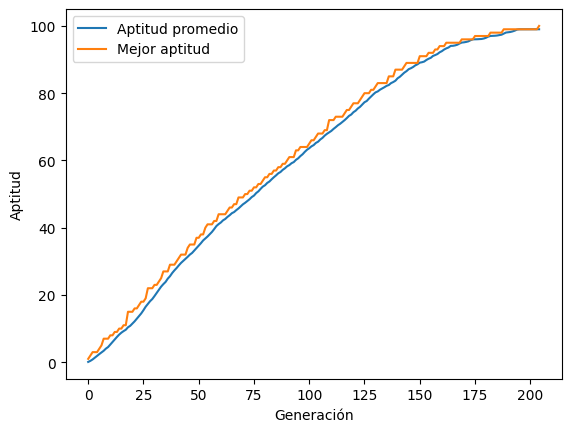

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [3]:
# Ejercicio 3. Minimizar en lugar de maximizar

def aptitud_ceros(individuo) -> float:
    """Función de aptitud para el problema de los 1000 ceros."""
    # Cuanto más ceros tenga el vector, mayor será su aptitud.
    return 100-sum(individuo)

INDIVIDUOS = 100
GENES = 100
MUTACION = 0.1

poblacion = np.random.choice([1], size=(INDIVIDUOS, GENES))
mejores_aptitudes = []
aptitud_promedio = []
mejor_aptitud_actual = max([aptitud_ceros(individuo) for individuo in poblacion])

max_iteraciones = 2000

while mejor_aptitud_actual < 100 and len(mejores_aptitudes) < max_iteraciones:
    nueva_generacion = []
    while len(nueva_generacion) < INDIVIDUOS:
        padres = seleccionar_ruleta(poblacion, 2)
        hijos = crossover(padres, tipo=2, probabilidad=0.7)
        for hijo in hijos:
            nueva_generacion.append(hijo)
    # Mutamos aleatoriamente
    mutar(nueva_generacion, 0.1)
    
    # Aplicamos el elitismo
    nueva_generacion = seleccion_elitista(np.vstack([poblacion, nueva_generacion]), INDIVIDUOS, aptitud_ceros)

    aptitudes = [aptitud_ceros(individuo) for individuo in nueva_generacion]
    mejor_aptitud_actual = np.max(aptitudes)
    mejores_aptitudes.append(mejor_aptitud_actual)
    aptitud_promedio.append(np.mean(aptitudes))
    poblacion = nueva_generacion
    
    if len(mejores_aptitudes) % 100 == 0:
        print(f'Generación {len(mejores_aptitudes)} Mejor aptitud {mejor_aptitud_actual}, aptitud promedio {aptitud_promedio[-1]}')

print(mejores_aptitudes[-1])

# Usar matplotlib para graficar la aptitud promedio y la mejor aptitud
import matplotlib.pyplot as plt

plt.plot(aptitud_promedio, label="Aptitud promedio")
plt.plot(mejores_aptitudes, label="Mejor aptitud")
plt.xlabel("Generación")
plt.ylabel("Aptitud")
plt.legend()
plt.show()

#Para cerciorarnos de que el algoritmo ha funcionado, imprimimos el mejor individuo
mejor_individuo = poblacion[np.argmax([aptitud_ceros(individuo) for individuo in poblacion])]
print(mejor_individuo)